In [39]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [40]:
path_to_data = 'https://raw.githubusercontent.com/esnet/daphne/master/Multivariate-TimeSeries/Conext/link_csvs/bost_amst_out.csv?token=AKKJU5UHIXXGZBX44QJRDFS5CONLA'

In [41]:
df = pd.read_csv(path_to_data)

In [42]:
df.head()

,Days,L28-bandwidth
0,16/10/2018 00:00,347.829680
1,16/10/2018 01:00,275.334507
2,16/10/2018 02:00,168.474651
3,16/10/2018 03:00,143.830323
4,16/10/2018 04:00,271.596804


In [43]:
df.tail()

,Days,L28-bandwidth
2155,13/01/2019 19:00,143.211147
2156,13/01/2019 20:00,149.098428
2157,13/01/2019 21:00,143.253542
2158,13/01/2019 22:00,145.124550
2159,13/01/2019 23:00,135.015699


In [44]:
df.describe()

,L28-bandwidth
count,2160.000000
mean,956.006477
std,513.670666
min,0.000000
25%,609.614343
50%,899.417671
75%,1238.378671
max,4047.568218


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 2 columns):
Days             2160 non-null object
L28-bandwidth    2160 non-null float64
dtypes: float64(1), object(1)
memory usage: 33.8+ KB


In [46]:
df.isnull().sum()

Days             0
L28-bandwidth    0
dtype: int64

In [47]:
df.dtypes

Days              object
L28-bandwidth    float64
dtype: object

Text(0.5,1,'bost_amst_out Link Speed Over Time In Hours')

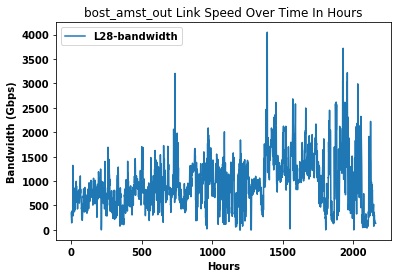

In [48]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Bandwidth (Gbps)')
plt.title('bost_amst_out Link Speed Over Time In Hours')

In [49]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [50]:
df.dtypes

Days             datetime64[ns]
L28-bandwidth           float64
dtype: object

In [51]:
df = df.set_index('Days')

In [52]:
df.head()

,L28-bandwidth
Days,
2018-10-16 00:00:00,347.829680
2018-10-16 01:00:00,275.334507
2018-10-16 02:00:00,168.474651
2018-10-16 03:00:00,143.830323
2018-10-16 04:00:00,271.596804


In [53]:
df.tail()

,L28-bandwidth
Days,
2019-01-13 19:00:00,143.211147
2019-01-13 20:00:00,149.098428
2019-01-13 21:00:00,143.253542
2019-01-13 22:00:00,145.124550
2019-01-13 23:00:00,135.015699


In [54]:
average_daily_speed = df.resample('D').mean()

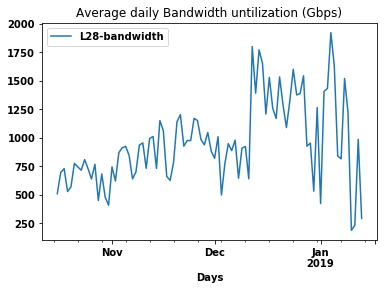

In [55]:
average_daily_speed.plot()
plt.title('Average daily Bandwidth untilization (Gbps)')
plt.show()

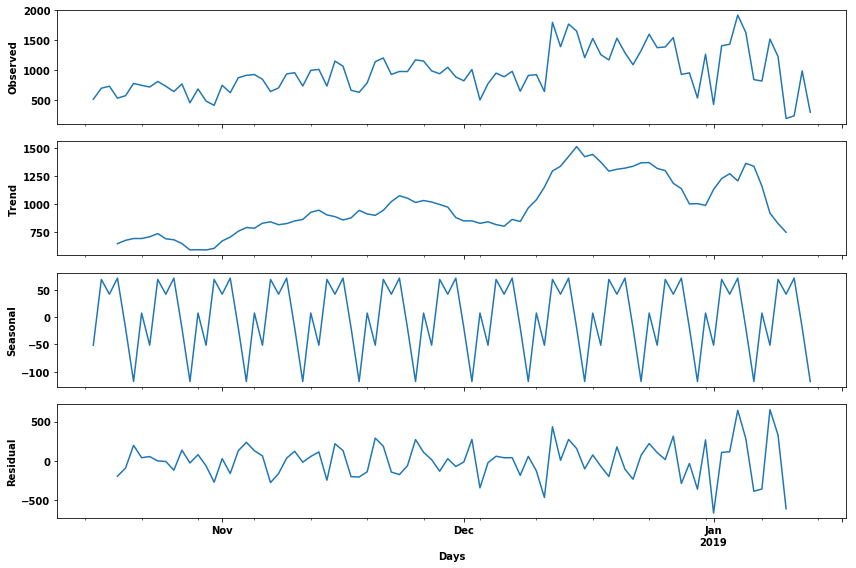

In [74]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show()

In [75]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [76]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [77]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [78]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1488.9570290753925
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1238.634220360381
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1145.222493643347
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:971.3387253908741
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1161.0298640260635
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1140.4014312054944
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:987.6252862031864
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:971.2192598553672
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1399.1479597716543
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1180.912944183823
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1122.7714249166643
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:947.3166417719108
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1151.7653243313152
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1116.5319165525727
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:978.3139236038365
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:948.7009314522747
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1285.6967833339304
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1119.9904811623187
A

In [61]:
#Lowest AIC : ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:709.973547601076

In [79]:
mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2778      0.191      1.457      0.145      -0.096       0.651
ma.L1         -0.8331      0.118     -7.051      0.000      -1.065      -0.602
ar.S.L12       0.0227      0.371      0.061      0.951      -0.705       0.750
ma.S.L12      -0.7154      0.557     -1.284      0.199      -1.808       0.377
sigma2      1.238e+05   3.21e+04      3.862      0.000     6.1e+04    1.87e+05


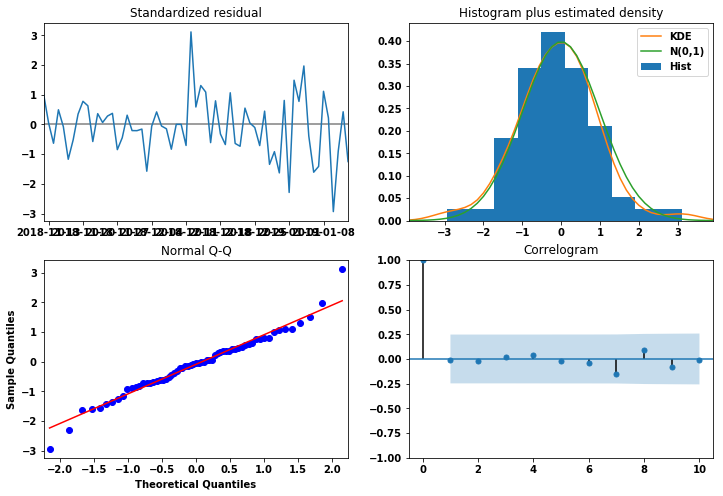

<Figure size 864x576 with 0 Axes>

In [80]:
results.plot_diagnostics()
plt.show()
plt.tight_layout()

In [81]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-20'), dynamic=False)
pred_ci = pred.conf_int()

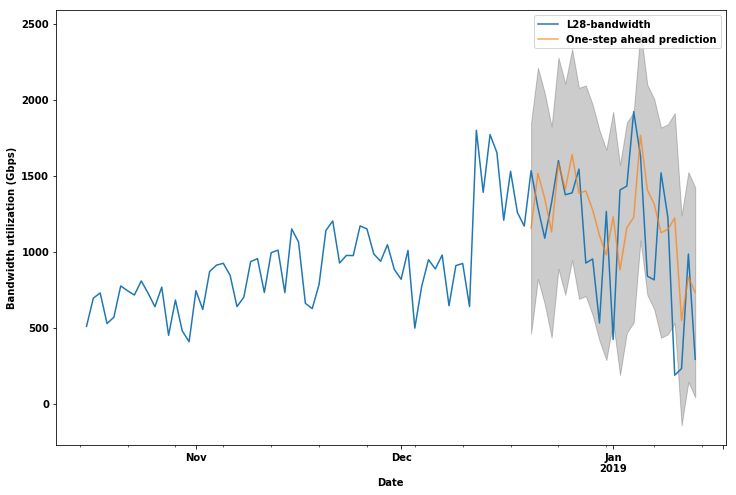

In [82]:
ax = average_daily_speed['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead prediction', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Bandwidth utilization (Gbps)')
plt.legend()

plt.show()

In [83]:
#df_mse = pd.read_csv('mse_aofa_lond_in.csv')
#df_mse = df_mse.set_index('Days')
#y_forecasted = df_mse['y_forecasted']
#y_truth = df_mse['y_truth']
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [84]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

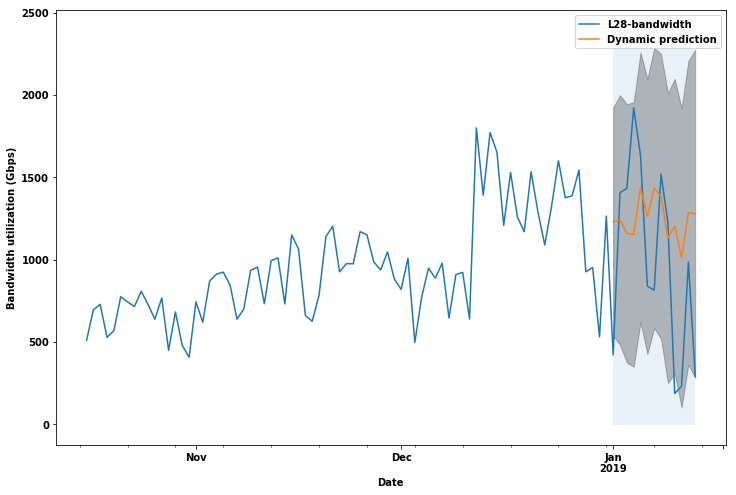

In [85]:
ax = average_daily_speed['2018':].plot(label='observed')
pred_dynamic.predicted_mean.plot(label='Dynamic prediction', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-01'), average_daily_speed.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Bandwidth utilization (Gbps)')

plt.legend()
plt.show()

In [86]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

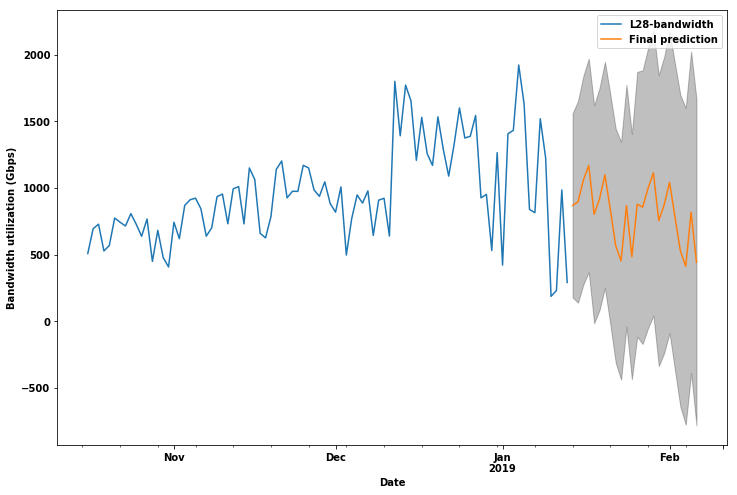

In [87]:
ax = average_daily_speed.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Final prediction')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bandwidth utilization (Gbps)')

plt.legend()
plt.show()

In [91]:
y_forecasted = pred.predicted_mean
y_truth = average_daily_speed['2018-12-20':]

In [92]:
y_forecasted=pd.DataFrame(y_forecasted, columns = ['L28-bandwidth'])

In [93]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is L28-bandwidth    190825.12
dtype: float64
The Root Mean Squared Error of our forecasts is L28-bandwidth    436.84
dtype: float64
